## **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import makedirs
makedirs("./plots", exist_ok=True)

## **Carrega dados**

In [2]:
df = pd.read_csv("./data/run.csv", sep=";")
df.head(1)

,flags,n_threads,nx,result,elapsed
0,None,1,512,0.040274,2.49003


## **Análise da performance single thread**

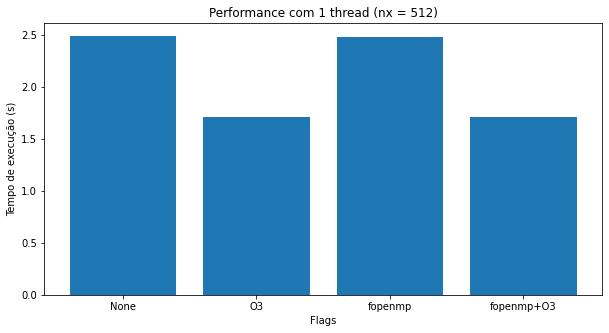

In [3]:
plt.figure(figsize=(10,5))
plt.bar(list(df["flags"].unique()), list(df.loc[(df["n_threads"] == 1) & (df["nx"] == 512)]["elapsed"]), color="C0")
plt.xlabel("Flags")
plt.ylabel("Tempo de execução (s)")
plt.title("Performance com 1 thread (nx = 512)")
plt.savefig(f"./plots/performance_singlethread_512.jpg", dpi=300.0);

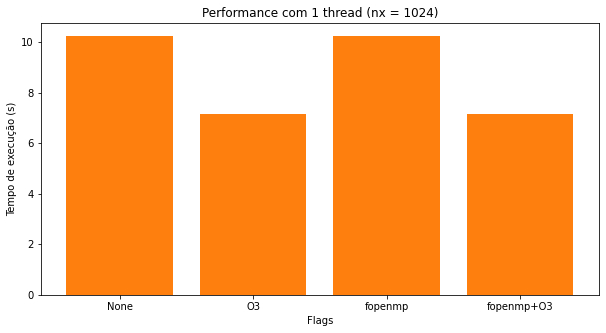

In [4]:
plt.figure(figsize=(10,5))
plt.bar(list(df["flags"].unique()), list(df.loc[(df["n_threads"] == 1) & (df["nx"] == 1024)]["elapsed"]), color="C1")
plt.xlabel("Flags")
plt.ylabel("Tempo de execução (s)")
plt.title("Performance com 1 thread (nx = 1024)")
plt.savefig(f"./plots/performance_singlethread_1024.jpg", dpi=300.0);

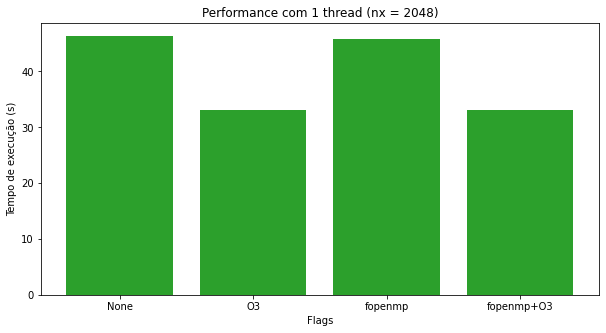

In [5]:
plt.figure(figsize=(10,5))
plt.bar(list(df["flags"].unique()), list(df.loc[(df["n_threads"] == 1) & (df["nx"] == 2048)]["elapsed"]), color="C2")
plt.xlabel("Flags")
plt.ylabel("Tempo de execução (s)")
plt.title("Performance com 1 thread (nx = 2048)")
plt.savefig(f"./plots/performance_singlethread_2048.jpg", dpi=300.0);

## **Análise da performance multi thread**

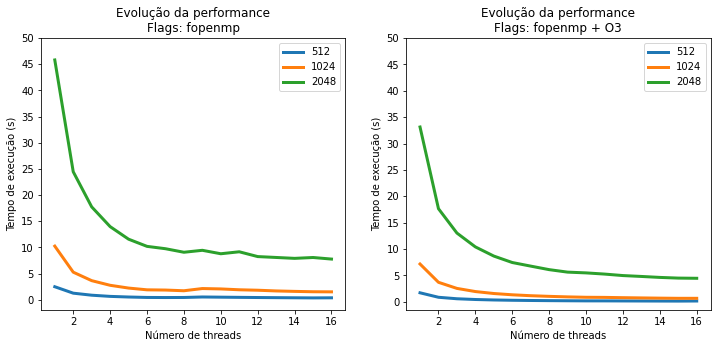

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
for nx in df["nx"].unique():
    tmp = df.loc[(df["flags"] == "fopenmp") & (df["nx"] == nx)]
    axs[0].plot(tmp["n_threads"], tmp["elapsed"], label=nx, linewidth=3)
axs[0].set_title("Evolução da performance\nFlags: fopenmp")
for nx in df["nx"].unique():
    tmp = df.loc[(df["flags"] == "fopenmp+O3") & (df["nx"] == nx)]
    axs[1].plot(tmp["n_threads"], tmp["elapsed"], label=nx, linewidth=3)
axs[1].set_title("Evolução da performance\nFlags: fopenmp + O3")
for ax in axs.flat:
    ax.set(xlabel='Número de threads', ylabel='Tempo de execução (s)')
    ax.legend()
plt.setp(axs, xticks=list(range(0,17,2))[1:], yticks=range(0, 51, 5));
plt.rcParams.update({'font.size': 16})
plt.savefig(f"./plots/performance_multithread.jpg", dpi=300.0);

## **Análise da melhoria de performance com dois threads**

In [7]:
print("Flags: fopenmp")
for nx in df["nx"].unique():
    print(f"| nx={nx}:", round(df.loc[(df["flags"] == "fopenmp") & (df["nx"] == nx)]["elapsed"].iloc[1]/df.loc[(df["flags"] == "fopenmp") & (df["nx"] == nx)]["elapsed"].iloc[0], 3), "%")
print()
print("Flags: fopenmp + O3")
for nx in df["nx"].unique():
    print(f"| nx={nx}:", round(df.loc[(df["flags"] == "fopenmp+O3") & (df["nx"] == nx)]["elapsed"].iloc[1]/df.loc[(df["flags"] == "fopenmp") & (df["nx"] == nx)]["elapsed"].iloc[0], 3), "%")

Flags: fopenmp
| nx=512: 0.505 %
| nx=1024: 0.514 %
| nx=2048: 0.534 %

Flags: fopenmp + O3
| nx=512: 0.347 %
| nx=1024: 0.361 %
| nx=2048: 0.385 %
